# Parameters Estimation <a name="params"></a> 

In [ ]:
import sys 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

'''for calibration'''
from scipy.stats import poisson  

'''for derivative'''
from scipy.integrate import odeint

In [ ]:
import pandas as pd
import pandas as pd
df = pd.read_excel('wiki_cases_covid.xlsx',header=[0,1])
df['Data']=pd.to_datetime(df['Date']['Unnamed: 0_level_1'], infer_datetime_format=True)
df = df.set_index('Data', drop=True).drop('Date', axis = 1)
df

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


Confirmed         Deaths  ... Recoveries Susceptibles    Tests
                 New   Total    New  ...      Total        Total    Total
Data                                 ...                                 
2020-01-31         2       2      0  ...          0     60479998      NaN
2020-02-06         1       3      0  ...          0     60479997      NaN
2020-02-21        17      20      1  ...          0     60479980      NaN
2020-02-22        59      79      1  ...          0     60479923      NaN
2020-02-23        71     150      1  ...          0     60479850      NaN
...              ...     ...    ...  ...        ...          ...      ...
2020-07-20       190  244624     13  ...     197162     60235376  6262302
2020-07-21       129  244752     15  ...     197431     60235248  6305412
2020-07-22       282  245032      9  ...     197628     60234968  6354730
2020-07-23       306  245338     10  ...     197842     60234662  6415041
2020-07-24       252  245590      5  ...     198192     60234410  6468375

[157 rows x 10 columns]

In [ ]:
df['2020-01-31' :'2020-03-08']

Confirmed       Deaths        ... Recoveries       Susceptibles   Tests
                 New Total    New Total  ...        New Total        Total   Total
Data                                     ...                                      
2020-01-31         2     2      0     0  ...          0     0     60479998     NaN
2020-02-06         1     3      0     0  ...          0     0     60479997     NaN
2020-02-21        17    20      1     1  ...          0     0     60479980     NaN
2020-02-22        59    79      1     2  ...          0     0     60479923     NaN
2020-02-23        71   150      1     3  ...          0     0     60479850     NaN
2020-02-24        77   227      4     7  ...          1     1     60479793     NaN
2020-02-25        93   320      3    10  ...          0     1     60479680  >8,600
2020-02-26       125   445      2    12  ...          2     3     60479555    9587
2020-02-27       205   650      5    17  ...         42    45     60479350   12014
2020-02-28       238   888      4    21  ...          1    46     60479112   15695
2020-02-29       240  1128      8    29  ...          4    50     60478872   18661
2020-03-01       566  1694      5    34  ...         33    83     60478306   21127
2020-03-02       342  2036     18    52  ...         66   149     60477964   23345
2020-03-03       466  2502     27    79  ...         11   160     60477498   25856
2020-03-04       587  3089     28   107  ...        116   276     60476911   29837
2020-03-05       769  3858     41   148  ...        138   414     60476142   32362
2020-03-06       778  4636     49   197  ...        109   523     60475364   36359
2020-03-07      1247  5883     36   233  ...         66   589     60474117   42062
2020-03-08      1492  7375    133   366  ...         33   622     60472625   49937

[19 rows x 10 columns]

In [ ]:
frame = { 'Date': df.reset_index()['Data'], 'I': df.reset_index()['Active']['Total'] } 
  
data=pd.DataFrame(frame)
data = data.set_index('Date')['2020-01-31' :'2020-03-08'].reset_index()
data

,Date,I
0,2020-01-31,2
1,2020-02-06,3
2,2020-02-21,19
3,2020-02-22,75
4,2020-02-23,147
5,2020-02-24,199
6,2020-02-25,309
7,2020-02-26,430
8,2020-02-27,588
9,2020-02-28,821


In [ ]:
def SIR_eq(INPUT,t,  beta, gamma, mu):
    S, I, R = INPUT
    dS_dt = -(beta*S*I/N)
    dI_dt =  (beta*S*I/N) - (gamma*I)-mu*I 
    dR_dt =  gamma*I
    return dS_dt, dI_dt, dR_dt

In [ ]:
ndays = len(data)
t = np.arange(1, ndays+1, 1)# initial population
N=6000000
y0 = N-100 ,100,0 

# parameters
d = 14 #average number of days to let individuals recover (recall : gamma = 1/d)
mu = 0.048

R0s = np.arange(0.2, 10, 0.001) #We test Ro from 1 to 2 by 0.001 increase.

In [ ]:
'''
5. Write a loop to test the different parameters:
   
   -compute the error with the MSE
'''
MSEs = []
I_hats = []

for R0 in R0s:
    beta= R0*1/d 
    gamma= 1/d
    
    #YOUR CODE HERE
    
    
    # Run the model over time 
    RES = odeint(SIR_eq, y0, t, args=(beta, gamma, mu))
    S, I_hat, R = RES.T

    I_hats.append(I_hat)
    
    MSE = np.sqrt(sum((I_hat-data.I)**2)/len(data.I))

    MSEs.append(MSE)

cal = pd.DataFrame({'R0': R0s, 'MSE': MSEs, 'I_hat': I_hats})


'''
6. Pick the best model 
'''
#YOUR CODE HERE
    
best_model = cal.loc[cal['MSE'].idxmin()]
print('BEST MODEL: RO: {}, MSE:{}'.format(round(best_model['R0'], 2), round(best_model['MSE'],2)))

BEST MODEL: RO: 4.43, MSE:136.74


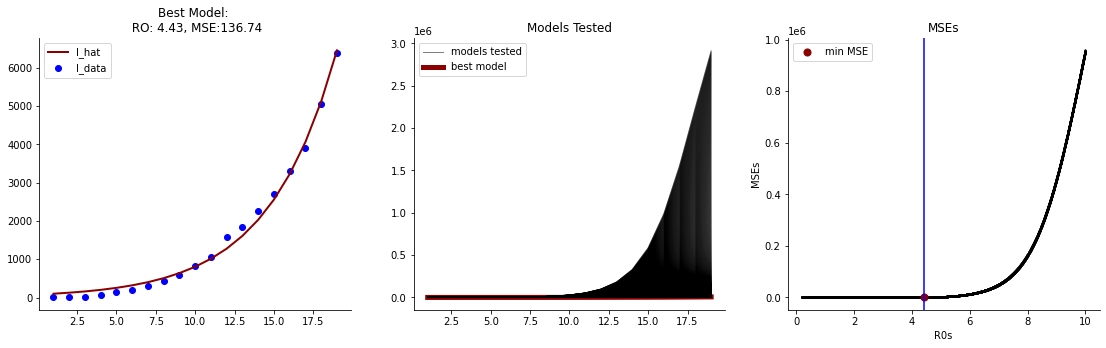

In [ ]:
'''
7. Some Plots
'''
fig, axs = plt.subplots(1,3, facecolor='w', figsize=(19,5))
axs[0].set_title('Best Model: \n RO: {}, MSE:{}'.format(round(best_model['R0'], 2), round(best_model['MSE'],2)))
axs[0].scatter(t, data.I, color = 'b', label = 'I_data')
axs[0].plot(t ,best_model['I_hat'], alpha=1, lw=2, label='I_hat', color = 'darkred')

axs[1].set_title('Models Tested')
axs[1].plot(t, I_hats[0], alpha=0.5,  color = 'k', lw=1, label ='models tested' )
for R0, I in zip(R0s, I_hats[1:]):
    if R0 == best_model['R0']:
        axs[1].plot(t, I, c = 'darkred', lw=5, label = 'best model')
    else:
        axs[1].plot(t, I, alpha=0.05,  color = 'k', lw=1)
    
axs[2].set_title('MSEs')
axs[2].scatter(cal['R0'], cal['MSE'], color = 'k' , s =1 )
axs[2].scatter(best_model['R0'], best_model['MSE'], color = 'darkred' , s =50, label='min MSE' )
axs[2].axvline(x= best_model['R0'], ymin=0, ymax=2, c= 'b')
axs[2].set_xlabel('R0s')
axs[2].set_ylabel('MSEs')

for i in range(3):
    axs[i].legend(fancybox = True)
    for spine in ('top', 'right'): 
        axs[i].spines[spine].set_visible(False)

In [ ]:
ndays = len(df)
t = np.arange(1, ndays+1, 1)
beta = 4.43*1/14
gamma = 1/14

RES = odeint(SIR_eq, y0, t, args=(beta, gamma, mu))
S, I_hat, R = RES.T

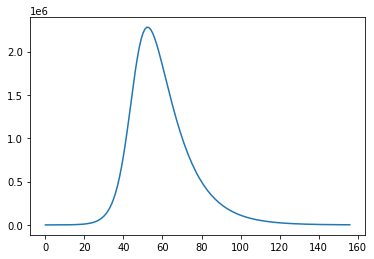

In [ ]:
plt.plot(I_hat)

In [ ]:
df.Data

0     2020-01-31
1     2020-02-06
2     2020-02-21
3     2020-02-22
4     2020-02-23
         ...    
152   2020-07-20
153   2020-07-21
154   2020-07-22
155   2020-07-23
156   2020-07-24
Name: Data, Length: 157, dtype: datetime64[ns]

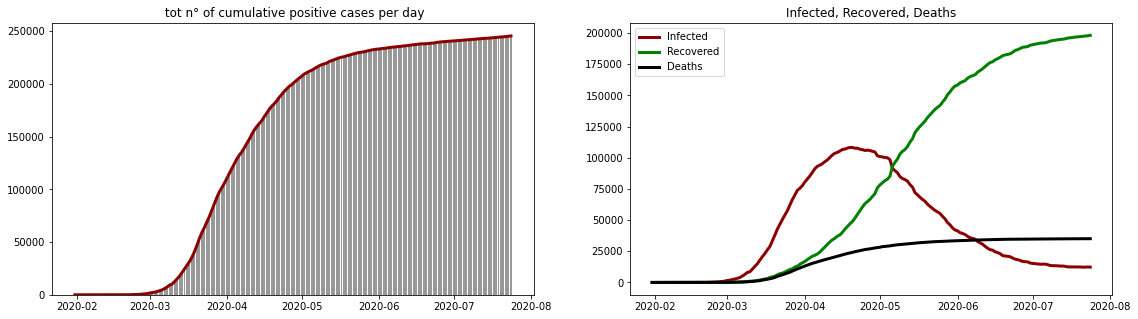

In [ ]:
import matplotlib.pyplot as plt
#df= df.reset_index()
df_beg = df[]

fig, axs = plt.subplots(1,2, facecolor='w', figsize=(19,5))
axs[0].set_title(' tot n° of cumulative positive cases per day')
axs[0].bar(df.Data, height=df['Confirmed']['Total'], color = 'k',alpha = 0.4)
axs[0].plot(df.Data ,df['Confirmed']['Total'], color = 'darkred',alpha = 1, lw= 3)

axs[1].set_title('Infected, Recovered, Deaths')
axs[1].plot(df.Data,df['Active']['Total'],color = 'darkred',alpha = 1, lw= 3, label = 'Infected')
axs[1].plot(df.Data,df['Recoveries']['Total'],color = 'green',alpha = 1, lw= 3, label = 'Recovered')
axs[1].plot(df.Data,df['Deaths']['Total'], color = 'black',alpha = 1, lw= 3, label = 'Deaths')
axs[1].legend()


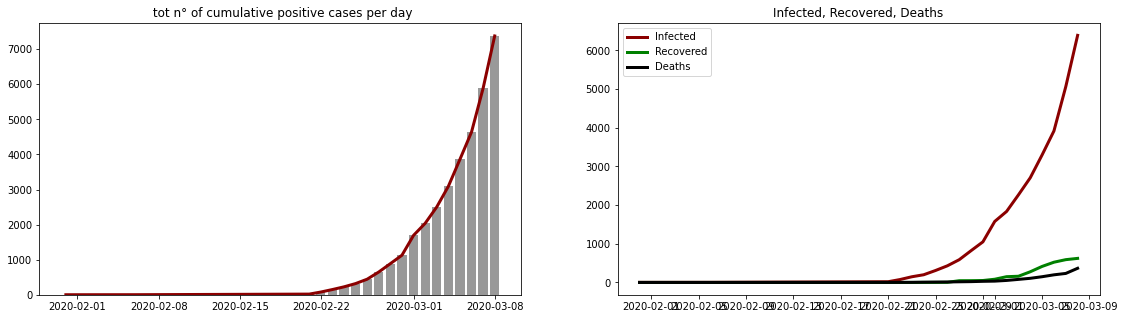

In [ ]:
df = df.set_index('Data')['2020-01-31' :'2020-03-08'].reset_index()
fig, axs = plt.subplots(1,2, facecolor='w', figsize=(19,5))
axs[0].set_title(' tot n° of cumulative positive cases per day')
axs[0].bar(df.Data, height=df['Confirmed']['Total'], color = 'k',alpha = 0.4)
axs[0].plot(df.Data ,df['Confirmed']['Total'], color = 'darkred',alpha = 1, lw= 3)

axs[1].set_title('Infected, Recovered, Deaths')
axs[1].plot(df.Data,df['Active']['Total'],color = 'darkred',alpha = 1, lw= 3, label = 'Infected')
axs[1].plot(df.Data,df['Recoveries']['Total'],color = 'green',alpha = 1, lw= 3, label = 'Recovered')
axs[1].plot(df.Data,df['Deaths']['Total'], color = 'black',alpha = 1, lw= 3, label = 'Deaths')
axs[1].legend()